In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
import pyforest
from DataPrep.load_data import load_data

In [25]:
df = load_data()
df = df.sort_index()

In [27]:
df.Label.unique()

array([0, 5, 6, 1, 3, 4, 7, 2])

In [50]:
df_energy = df.pivot(columns = "Label", values = "Energy (kWh)")

In [60]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Label_7', 'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

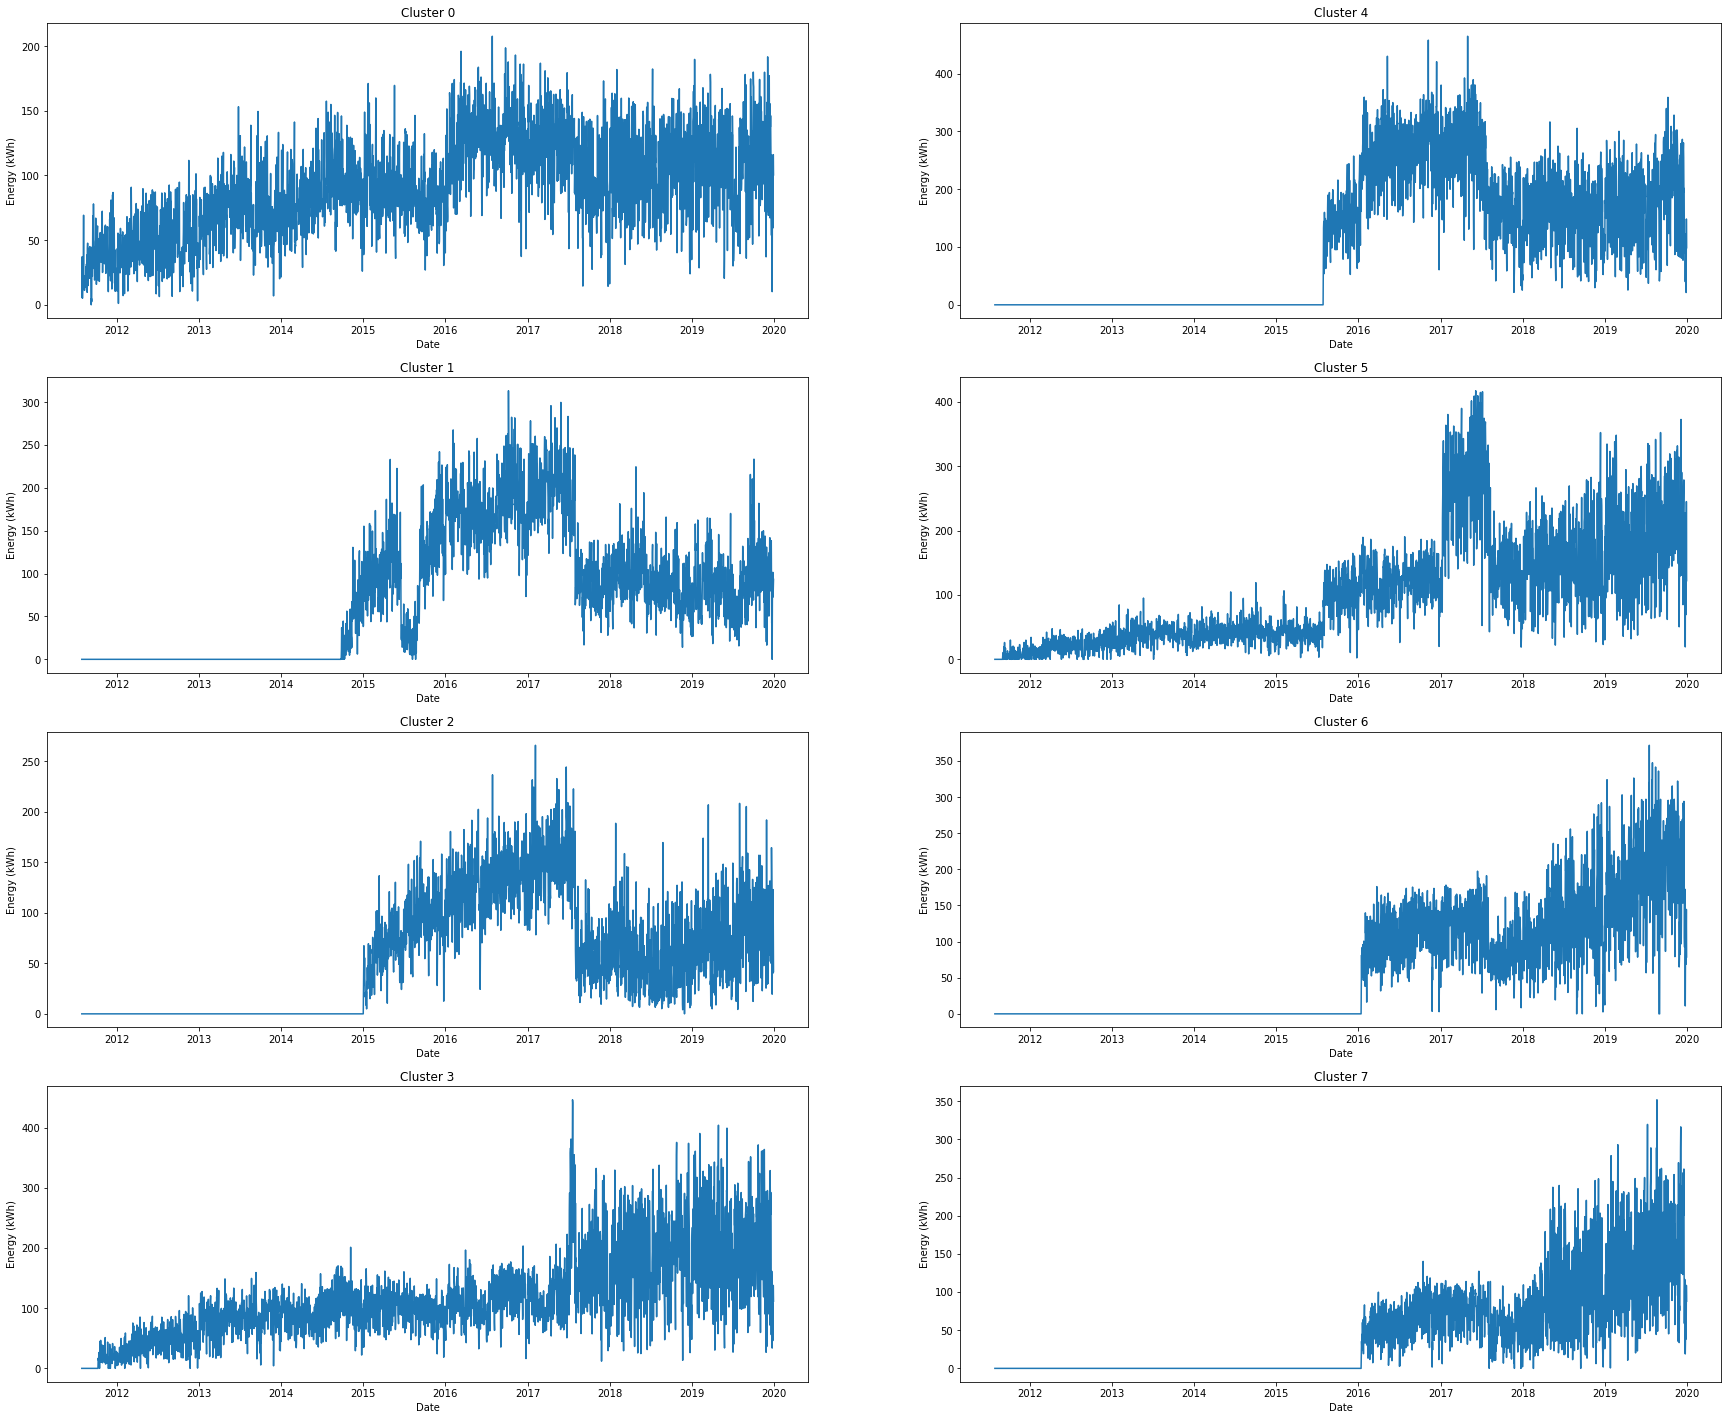

In [49]:
fig, ax = plt.subplots(4,2, figsize = (30,25))
sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 0], ax = ax[0][0])
ax[0][0].set_title("Cluster 0")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 1], ax = ax[1][0])
ax[1][0].set_title("Cluster 1")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 2], ax = ax[2][0])
ax[2][0].set_title("Cluster 2")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 3], ax = ax[3][0])
ax[3][0].set_title("Cluster 3")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 4], ax = ax[0][1])
ax[0][1].set_title("Cluster 4")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 5], ax = ax[1][1])
ax[1][1].set_title("Cluster 5")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 6], ax = ax[2][1])
ax[2][1].set_title("Cluster 6")

sns.lineplot(data = df["Energy (kWh)"][df["Label"] == 7], ax = ax[3][1])
ax[3][1].set_title("Cluster 7")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Label'>

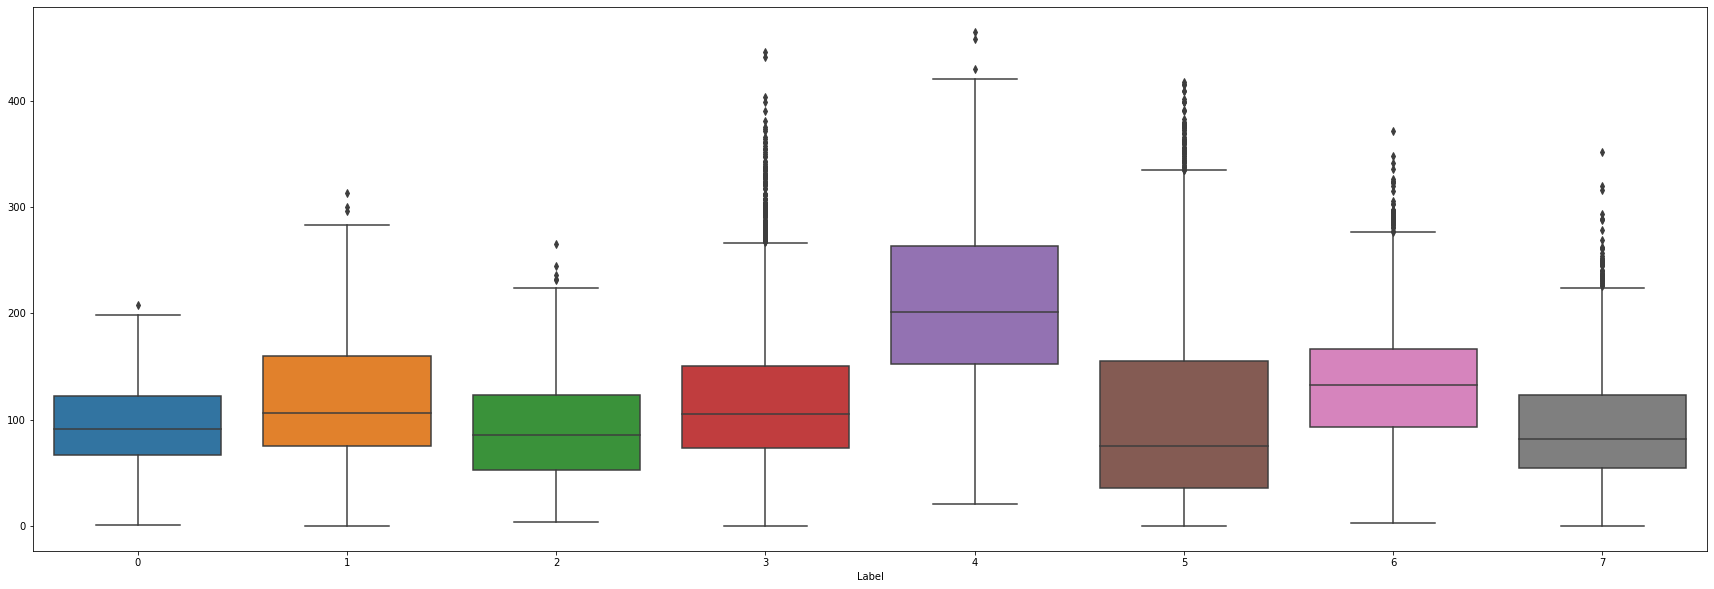

In [59]:
fig = plt.subplots(figsize = (30,10))
sns.boxplot(data = df_energy[df_energy != 0])

In [65]:
df = df.fillna(0)

In [74]:
corr = df[['Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Label_7']].corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

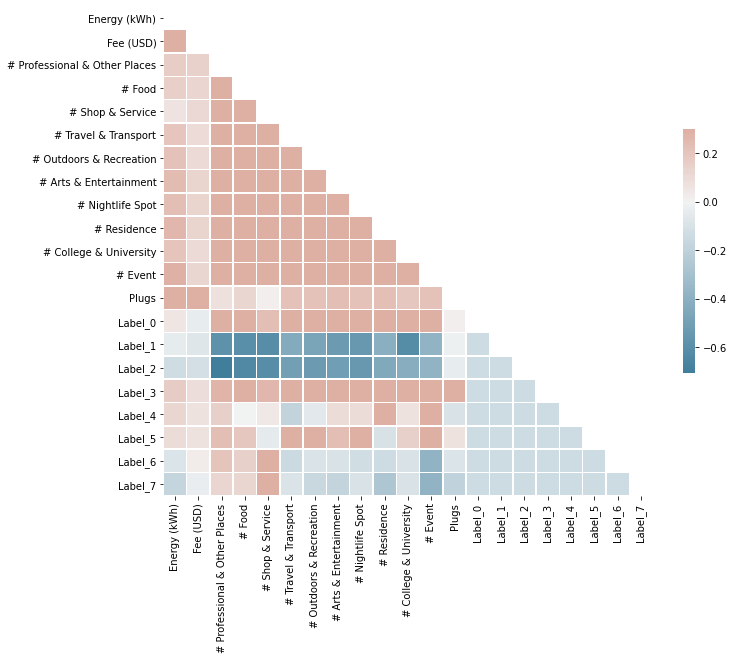

In [75]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})